<a href="https://colab.research.google.com/github/Gmahajan189/Project4/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Mobile')

In [ ]:
data.shape

(541, 12)

In [ ]:
print(f"The number of rows is:{data.shape[0]}")
print(f"The number of columns is:{data.shape[1]}")

The number of rows is:541
The number of columns is:12


In [ ]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [ ]:
data['Prize']

0       7,299
1       7,299
2      11,999
3       5,649
4       8,999
        ...  
536    79,999
537     5,998
538     9,990
539    38,999
540    15,999
Name: Prize, Length: 541, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


In [ ]:
data.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [ ]:
# Clean and convert 'Prize' column to numeric
data['Prize'] = data['Prize'].str.replace(',', '').astype(float)

# Display the updated DataFrame
print(data)

                     Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
numerical_cols

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

In [ ]:
categorical_cols

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')

In [ ]:
numerical_list = []
categorical_list = []

for col in data.columns:
    if data[col].dtype== 'object':
        categorical_list.append(col)
    else:
        numerical_list.append(col)

print("Numerical columns:", numerical_list)
print("Categorical columns:", categorical_list)


Numerical columns: ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']
Categorical columns: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


In [ ]:
def detect_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    outliers = pd.DataFrame()
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (data[col] < lower_bound) | (data[col] > upper_bound)
    return outliers

    # Detect outliers
outliers_df = detect_outliers_iqr(data)

In [ ]:
outliers_df.sum()

Memory            55
RAM                0
Battery_         152
AI Lens           34
Mobile Height     33
Prize             25
dtype: int64

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
#winsorization to handle outliers by capping extreme values at a certain percentile
# Columns with outliers
outlier_cols = ['Memory','Battery_']

In [ ]:
for col in outlier_cols:
  winsorized_values= winsorize(data[col], limits = [0.05,0.05])
  data[col]= winsorized_values

In [ ]:
# Verify outlier handling
# Calculate and print the count of outliers after winsorization
outliers_after = data[outlier_cols].apply(lambda x: (x < x.quantile(0.05)) | (x > x.quantile(0.95))).sum()
print("Outliers Count After Winsorization:")
print(outliers_after)

Outliers Count After Winsorization:
Memory      0
Battery_    0
dtype: int64


In [ ]:
from scipy.stats import skew

In [ ]:
# Calculate skewness for numeric columns
skewness_values = data[numerical_cols].apply(lambda x: skew(x.dropna()))
skewness_df = pd.DataFrame({'Feature': skewness_values.index, 'Skewness': skewness_values.values})

# Print results
print("\nSkewness:")
print(skewness_df)


Skewness:
         Feature  Skewness
0         Memory  1.049323
1            RAM  0.067429
2       Battery_  0.407259
3        AI Lens  3.602614
4  Mobile Height  1.168527
5          Prize  2.418849


In [ ]:
high_skew_cols = ['Memory','AI Lens']

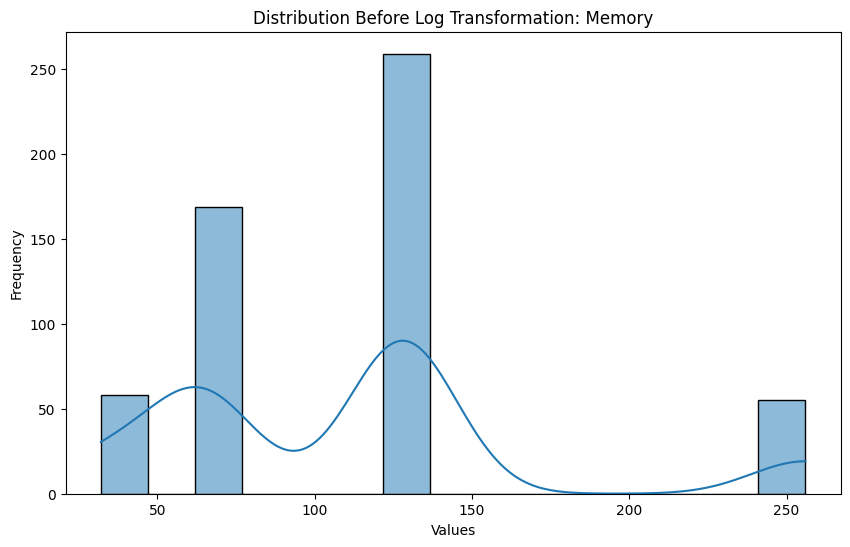

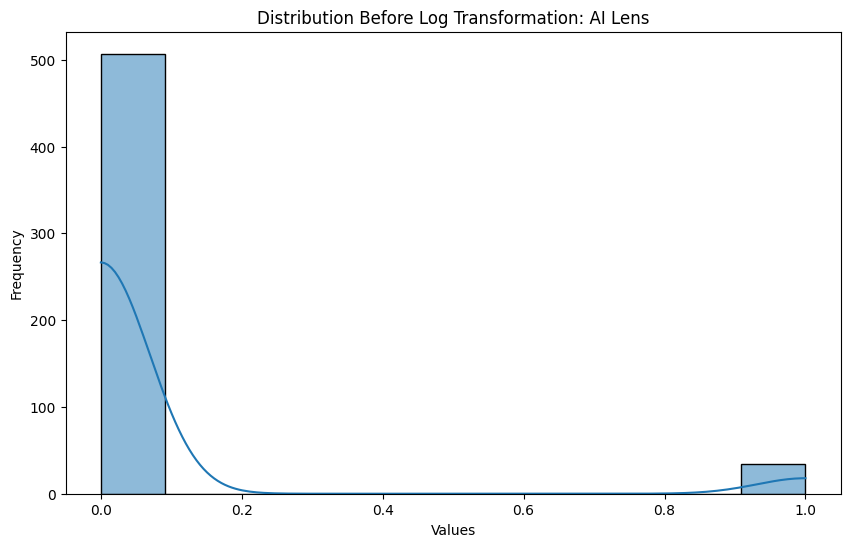

In [ ]:
for col in high_skew_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution Before Log Transformation: {col}')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()


In [ ]:
for col in high_skew_cols:
  data[col] = np.log1p(data[col])
skewness_after = data[high_skew_cols].apply(lambda x: skew(x.dropna()))
skewness_df_after = pd.DataFrame({'Feature': high_skew_cols, 'Skewness After': skewness_after})
print(skewness_df_after)

         Feature  Skewness After
Memory    Memory       -0.257913
AI Lens  AI Lens        3.602614


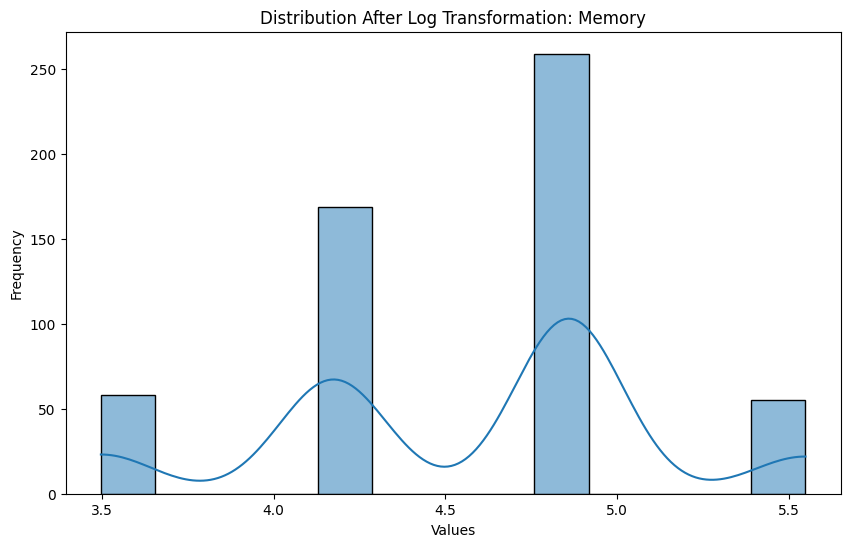

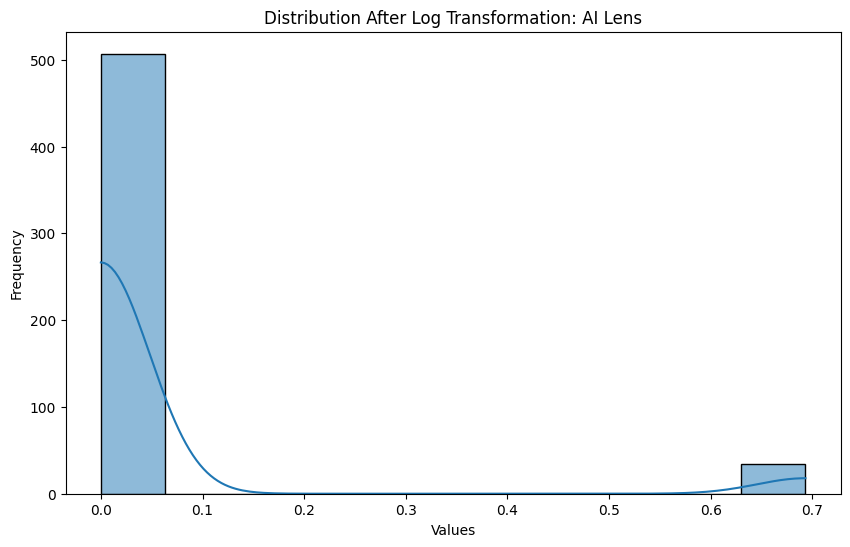

In [ ]:
# After Log Transformation
for col in high_skew_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution After Log Transformation: {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Initialize a dictionary to hold the decile percentages for each numerical column
decile_percentages = {col: [] for col in numerical_list}

# Loop through each numerical column
for col in numerical_list:
    # Calculate deciles for the column
    deciles = np.percentile(data[col], np.arange(10, 110, 10))
    print(f'deciles_for_{col} : {deciles}')

    # Calculate cumulative percentage of data points within each decile
    total_count = len(data[col])

    for i, threshold in enumerate(deciles):
        count = (data[col] <= threshold).sum()
        cumulative_percentage = count / total_count * 100
        decile_percentages[col].append(cumulative_percentage)

# Print decile percentages
for col in numerical_list:
    for i, percentage in enumerate(decile_percentages[col]):
        print(f"{col} - {(i+1)*10}% of data falls within DECILE{i+1}: {percentage:.2f}%")

# Create a DataFrame to store decile percentages for each column
decile_results = []
for col in numerical_list:
    for i in range(10):
        decile_results.append({
            'Column': col,
            'Decile': f"DECILE{i+1}",
            'Percentage': decile_percentages[col][i]
        })

decile_df = pd.DataFrame(decile_results)
print(decile_df)

deciles_for_Memory : [1.503301   1.64372093 1.64372093 1.64372093 1.76811759 1.76811759
 1.76811759 1.76811759 1.87932398 1.87932398]
deciles_for_RAM : [3. 4. 4. 4. 6. 6. 6. 8. 8. 8.]
deciles_for_Battery_ : [4500. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 6000.]
deciles_for_AI Lens : [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.52658903]
deciles_for_Mobile Height : [1.34765532 1.3513851  1.35182816 1.35329819 1.35432098 1.35504844
 1.35504844 1.3576461  1.35879013 1.56020645]
deciles_for_Prize : [ 6999.  8649.  9999. 11970. 13499. 15999. 17999. 21999. 29999. 80999.]
Memory - 10% of data falls within DECILE1: 10.72%
Memory - 20% of data falls within DECILE2: 41.96%
Memory - 30% of data falls within DECILE3: 41.96%
Memory - 40% of data falls within DECILE4: 41.96%
Memory - 50% of data falls within DECILE5: 89.83%
Memory - 60% of data falls within DECILE6: 89.83%
Memory - 70% of data falls within DECILE7: 89.83%
Memory - 80% of data 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


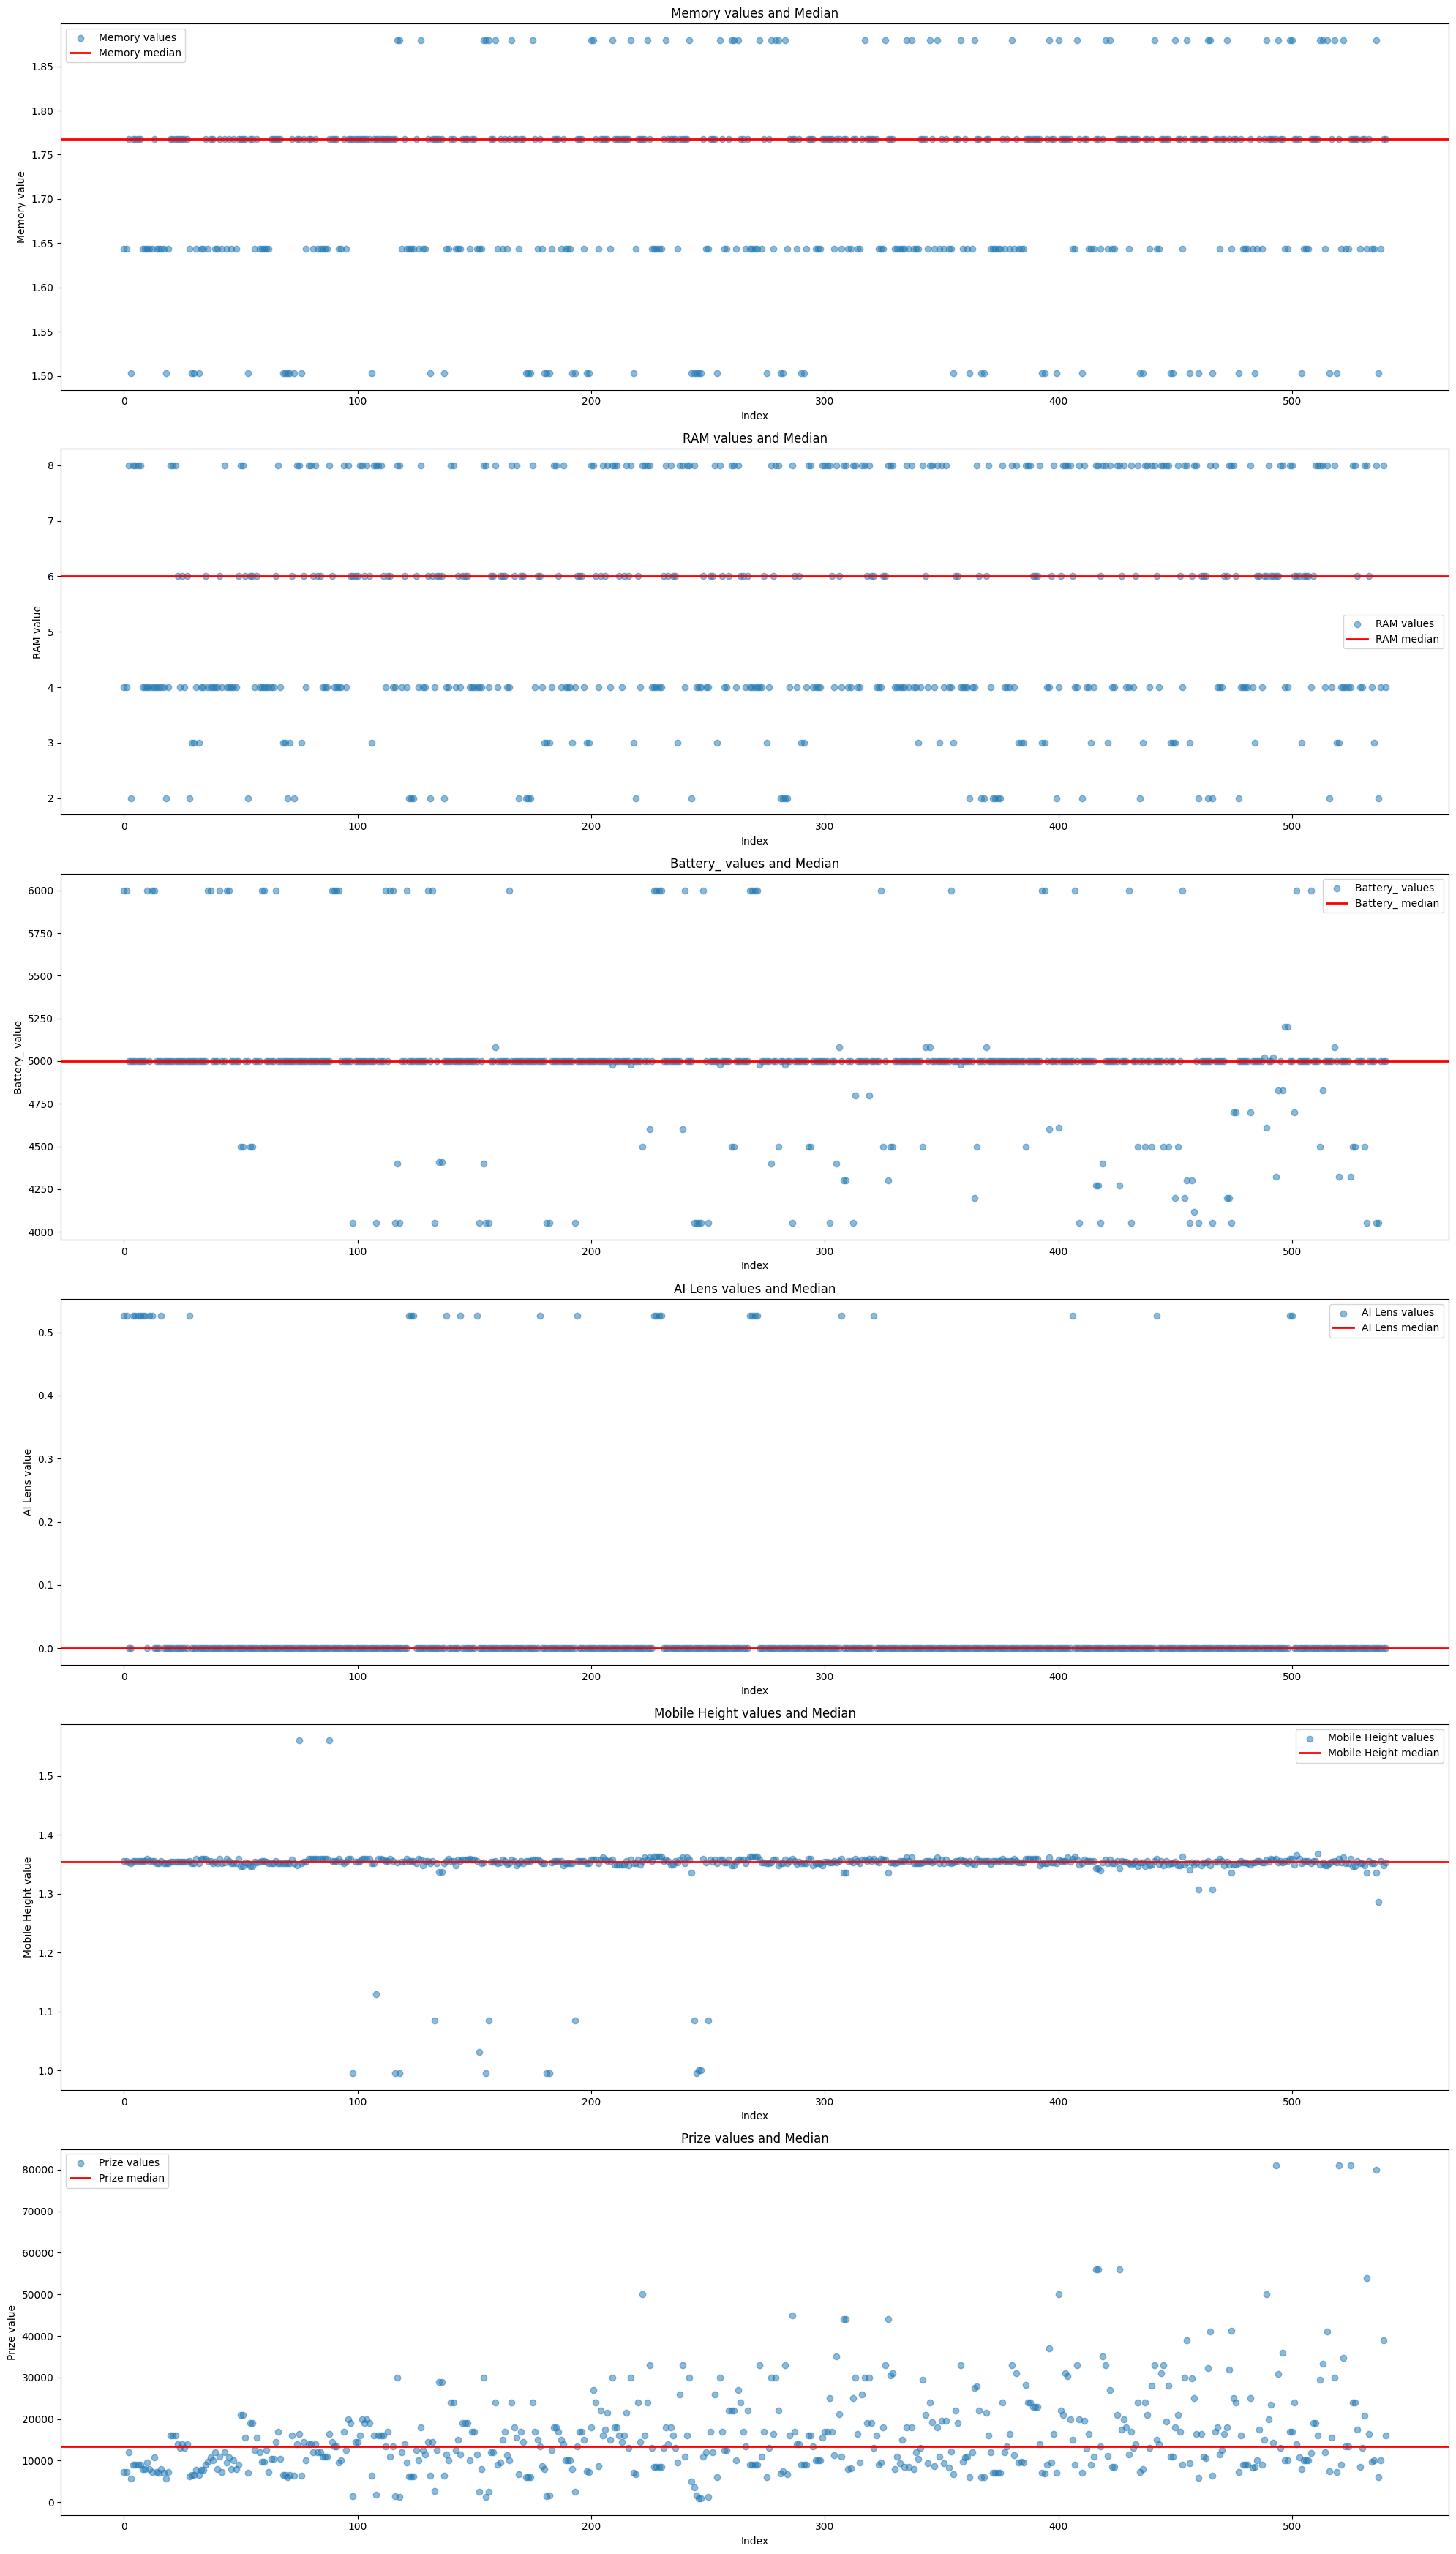

In [ ]:
# Plot the data points and median for each numerical column
plt.figure(figsize=(20, 35))  # Adjust the size as needed
# Iterate through numerical columns
for col in numerical_list:
    plt.subplot(len(numerical_list), 1, numerical_list.index(col) + 1)

    # Plot scatter plot
    plt.scatter(data.index, data[col], alpha=0.5, label=f'{col} values')

    # Calculate and plot median line
    median_val = data[col].median()
    plt.axhline(y=median_val, color='r', linestyle='-', linewidth=2, label=f'{col} median')

    # Set title, labels, and legend
    plt.title(f'{col} values and Median')
    plt.xlabel('Index')
    plt.ylabel(f'{col} value')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [ ]:
greater_than_less_than_median_dict = {}

# Loop through each column in the numerical_list
for col in numerical_list:
    greater_than_less_than_median_dict[col] = []
    median_value = data[col].median()
    # Compare each value in the column to the median of that column
    for value in data[col]:
        if value > median_value:
            greater_than_less_than_median_dict[col].append(1)
        else:
            greater_than_less_than_median_dict[col].append(0)


# Compare each value in the column to the median of that column
for col, values in greater_than_less_than_median_dict.items():
    print(f"Column: {col}")
    print(values)
    print()
    num_ones = values.count(1)
    num_zeros = values.count(0)
    total_values = len(values)
    percentage_ones = (num_ones / total_values) * 100
    percentage_zeros = (num_zeros / total_values) * 100
    print(f"Column: {col}")
    print(f"Values: {values}")
    print(f"Percentage of 1s: {percentage_ones:.2f}%")
    print(f"Percentage of 0s: {percentage_zeros:.2f}%")
    print()

Column: Memory
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


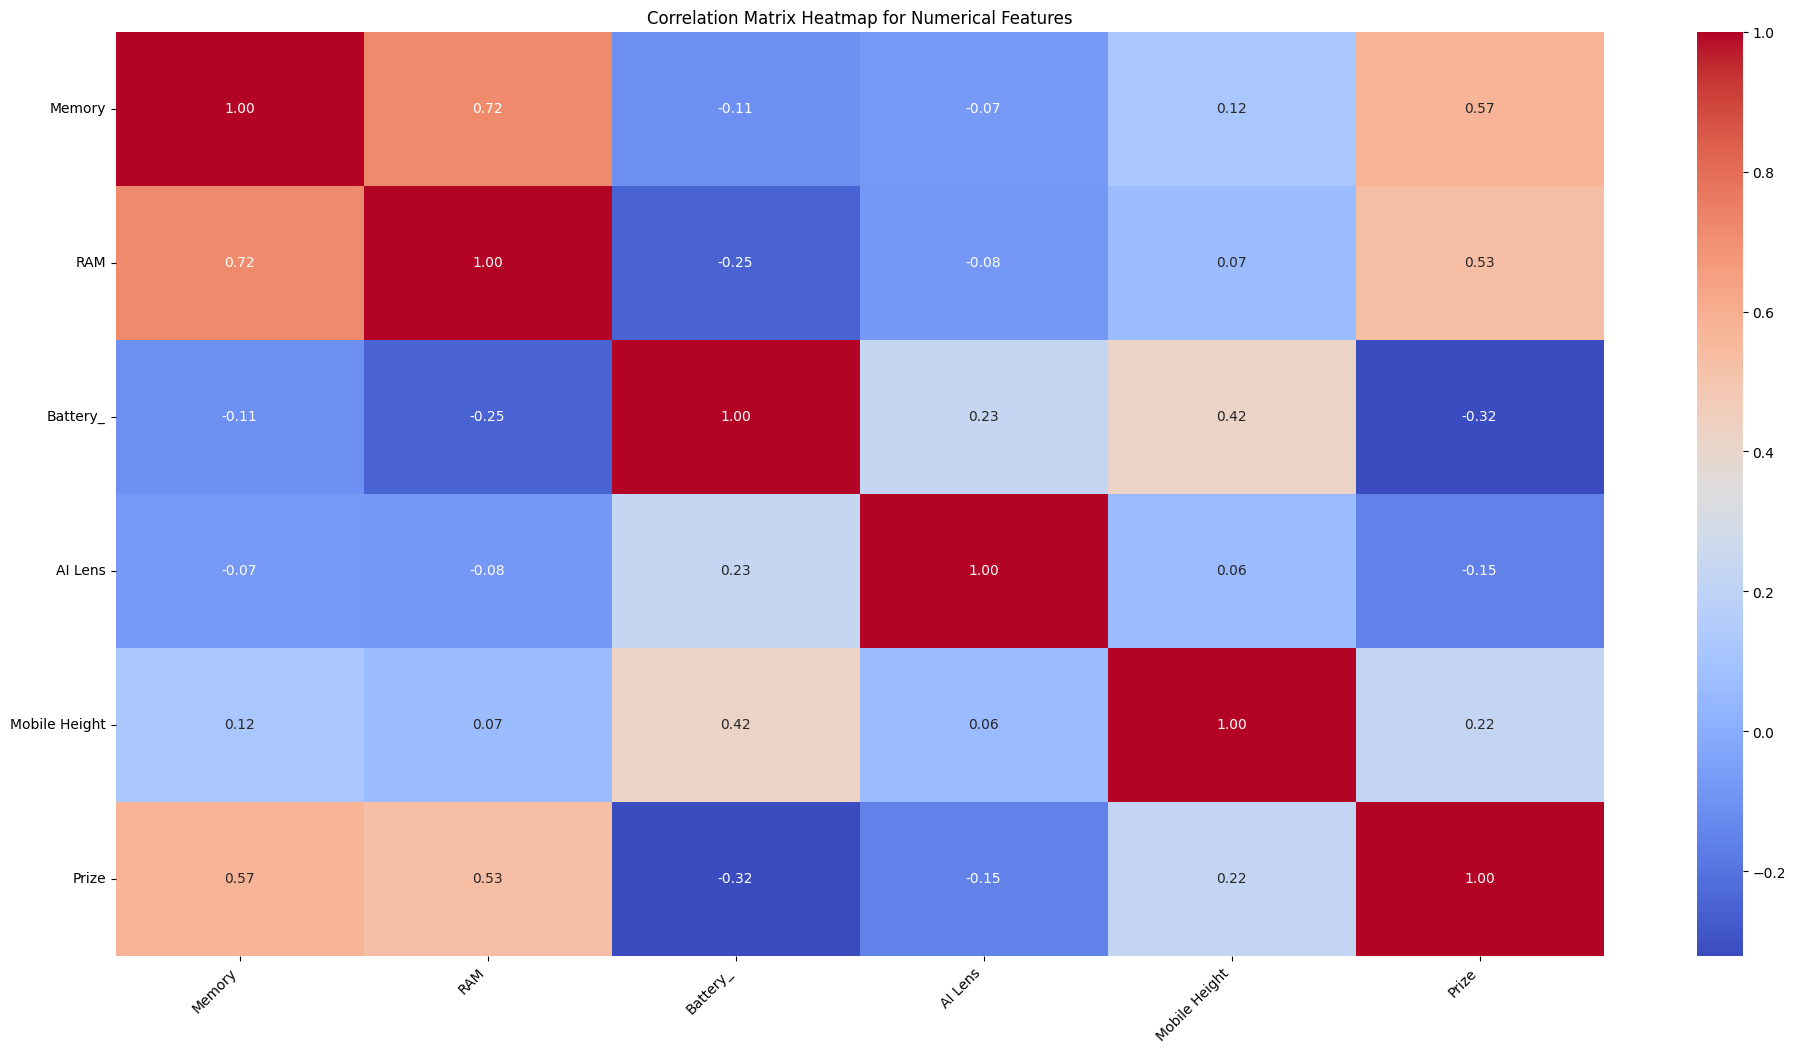

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = data[numerical_list].corr()

plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [ ]:
grouped_data1 = data.groupby('Prize').agg({
    'Memory': 'mean',
    'RAM' : 'mean',
    })
print(grouped_data1)

           Memory       RAM
Prize                      
920.0    3.496508  4.000000
1199.0   4.174387  4.000000
1299.0   5.549076  8.000000
1375.0   3.496508  3.000000
1422.0   4.859812  4.000000
...           ...       ...
49999.0  5.319322  6.000000
53999.0  4.174387  8.000000
55999.0  4.859812  8.000000
79999.0  5.549076  8.000000
80999.0  4.859812  4.333333

[158 rows x 2 columns]


In [ ]:
grouped_data = data.groupby('Prize').agg({
    'Mobile Height': 'mean',
    })
print(grouped_data)

         Mobile Height
Prize                 
920.0             4.57
1199.0            6.10
1299.0            4.50
1375.0            4.50
1422.0            4.50
...                ...
49999.0          16.88
53999.0          15.49
55999.0          16.00
79999.0          15.49
80999.0          17.02

[158 rows x 1 columns]


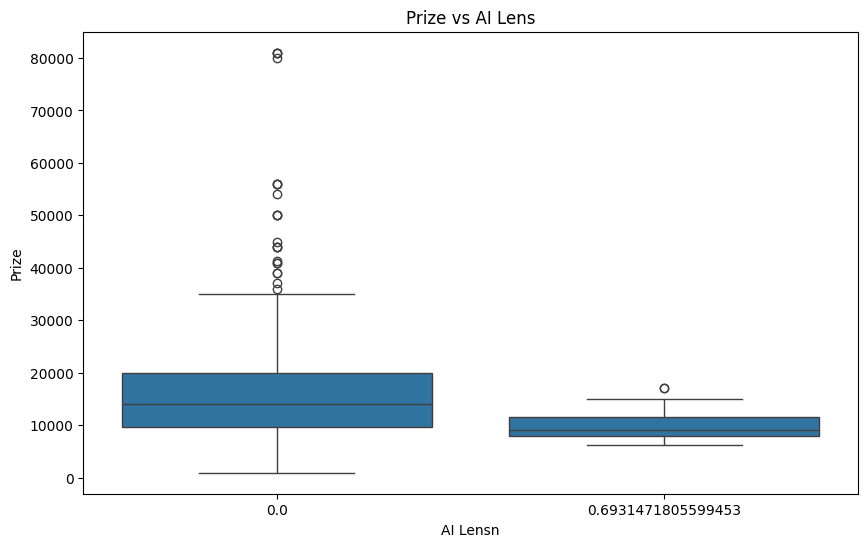

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI Lens', y='Prize', data=data)
plt.title('Prize vs AI Lens')
plt.xlabel('AI Lensn')
plt.ylabel('Prize')
plt.show()

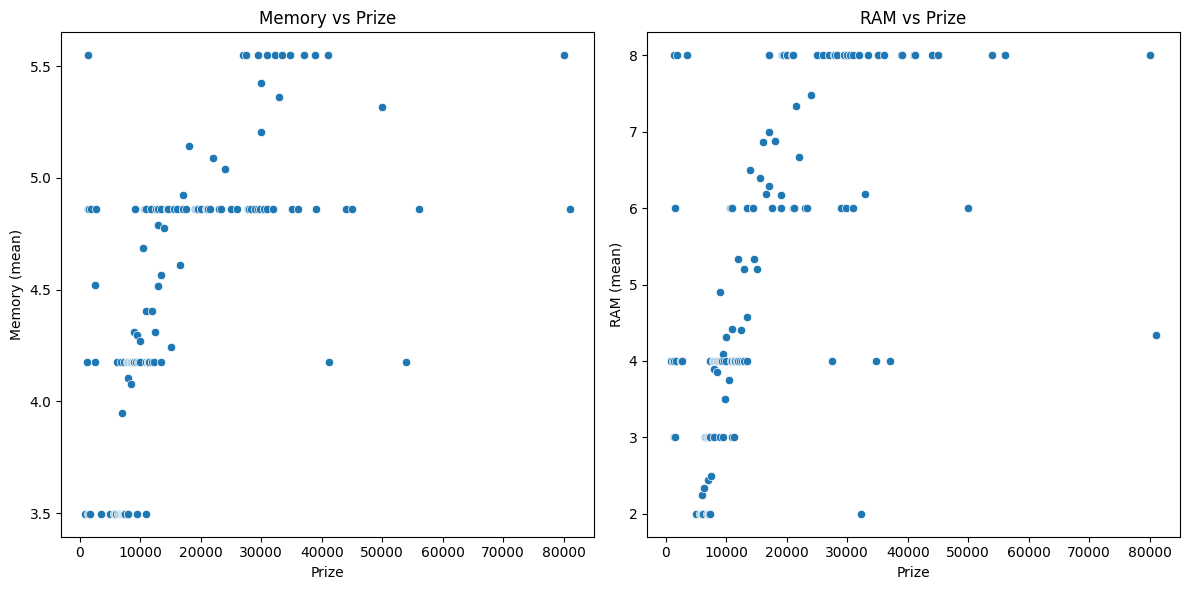

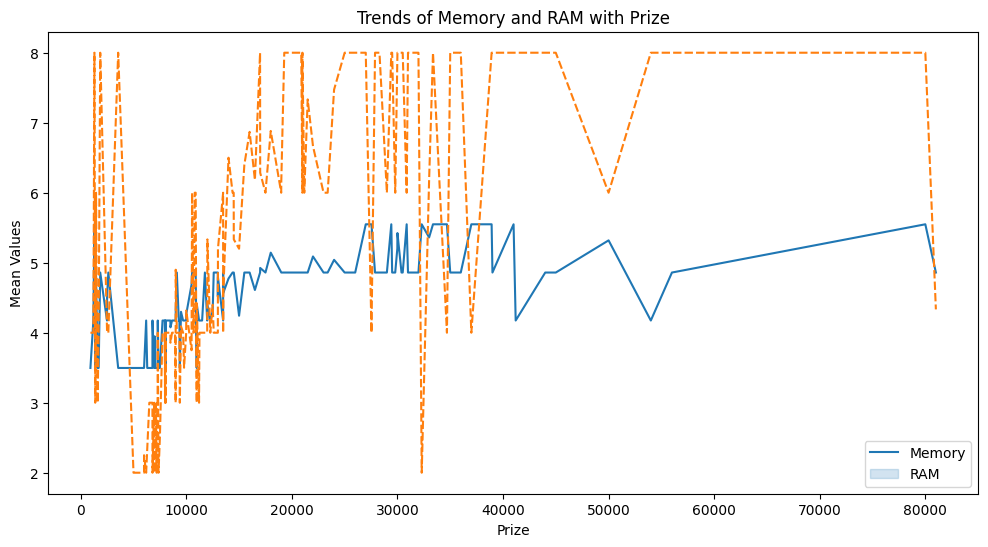

In [ ]:
# Scatter plot for Memory vs Prize and RAM vs Prize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=grouped_data1.index, y=grouped_data1['Memory'])
plt.title('Memory vs Prize')
plt.xlabel('Prize')
plt.ylabel('Memory (mean)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=grouped_data1.index, y=grouped_data1['RAM'])
plt.title('RAM vs Prize')
plt.xlabel('Prize')
plt.ylabel('RAM (mean)')

plt.tight_layout()
plt.show()

# Line plot for Memory and RAM trends with Prize
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data1)
plt.title('Trends of Memory and RAM with Prize')
plt.xlabel('Prize')
plt.ylabel('Mean Values')
plt.legend(['Memory', 'RAM'])
plt.show()

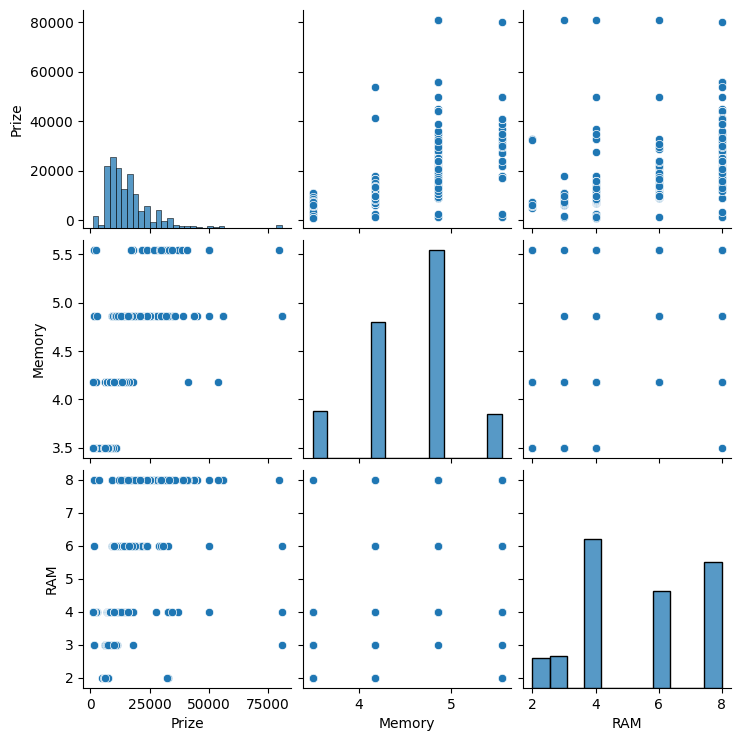

In [ ]:
sns.pairplot(data, vars=['Prize', 'Memory', 'RAM'])
plt.show()

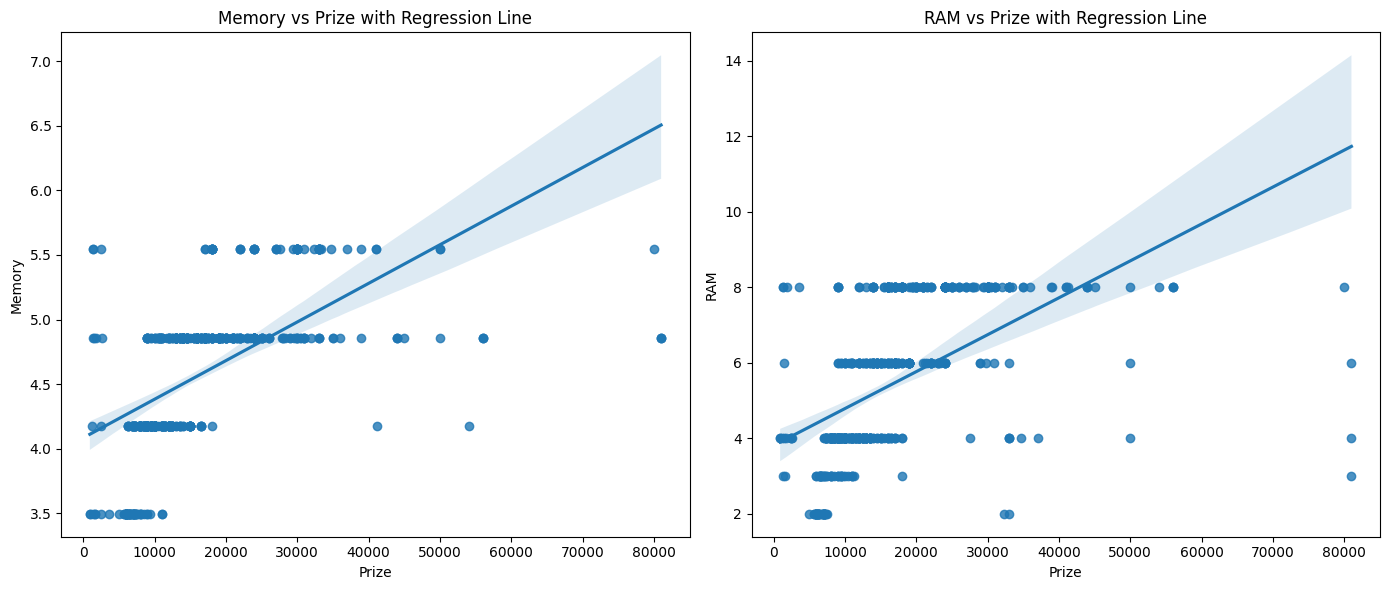

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=data['Prize'], y=data['Memory'])
plt.title('Memory vs Prize with Regression Line')

plt.subplot(1, 2, 2)
sns.regplot(x=data['Prize'], y=data['RAM'])
plt.title('RAM vs Prize with Regression Line')

plt.tight_layout()
plt.show()


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 541.

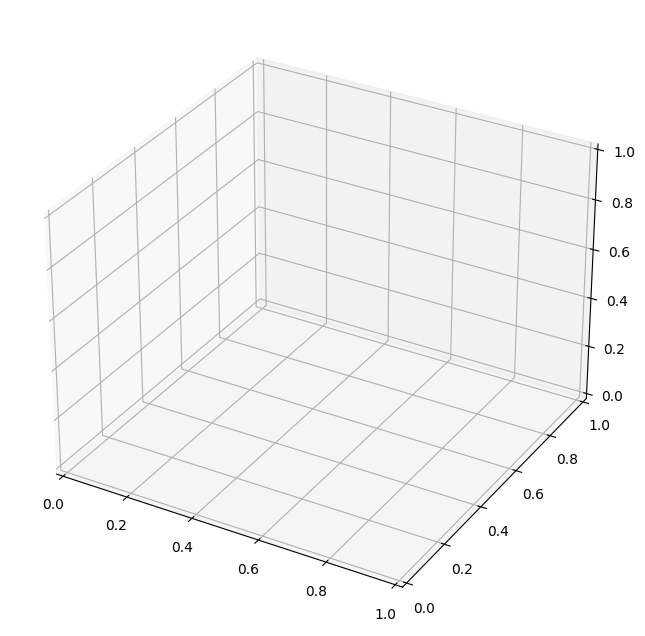

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for 'Memory' and 'RAM'
color_memory = 'blue'
color_ram = 'green'

ax.scatter(data['Prize'], data['Memory'], data['RAM'], c=[color_memory, color_ram], marker='o')
# Add color bar to show the mapping
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Color')
ax.set_xlabel('Prize')
ax.set_ylabel('Memory')
ax.set_zlabel('RAM')
# Add legend
ax.legend()

plt.show()


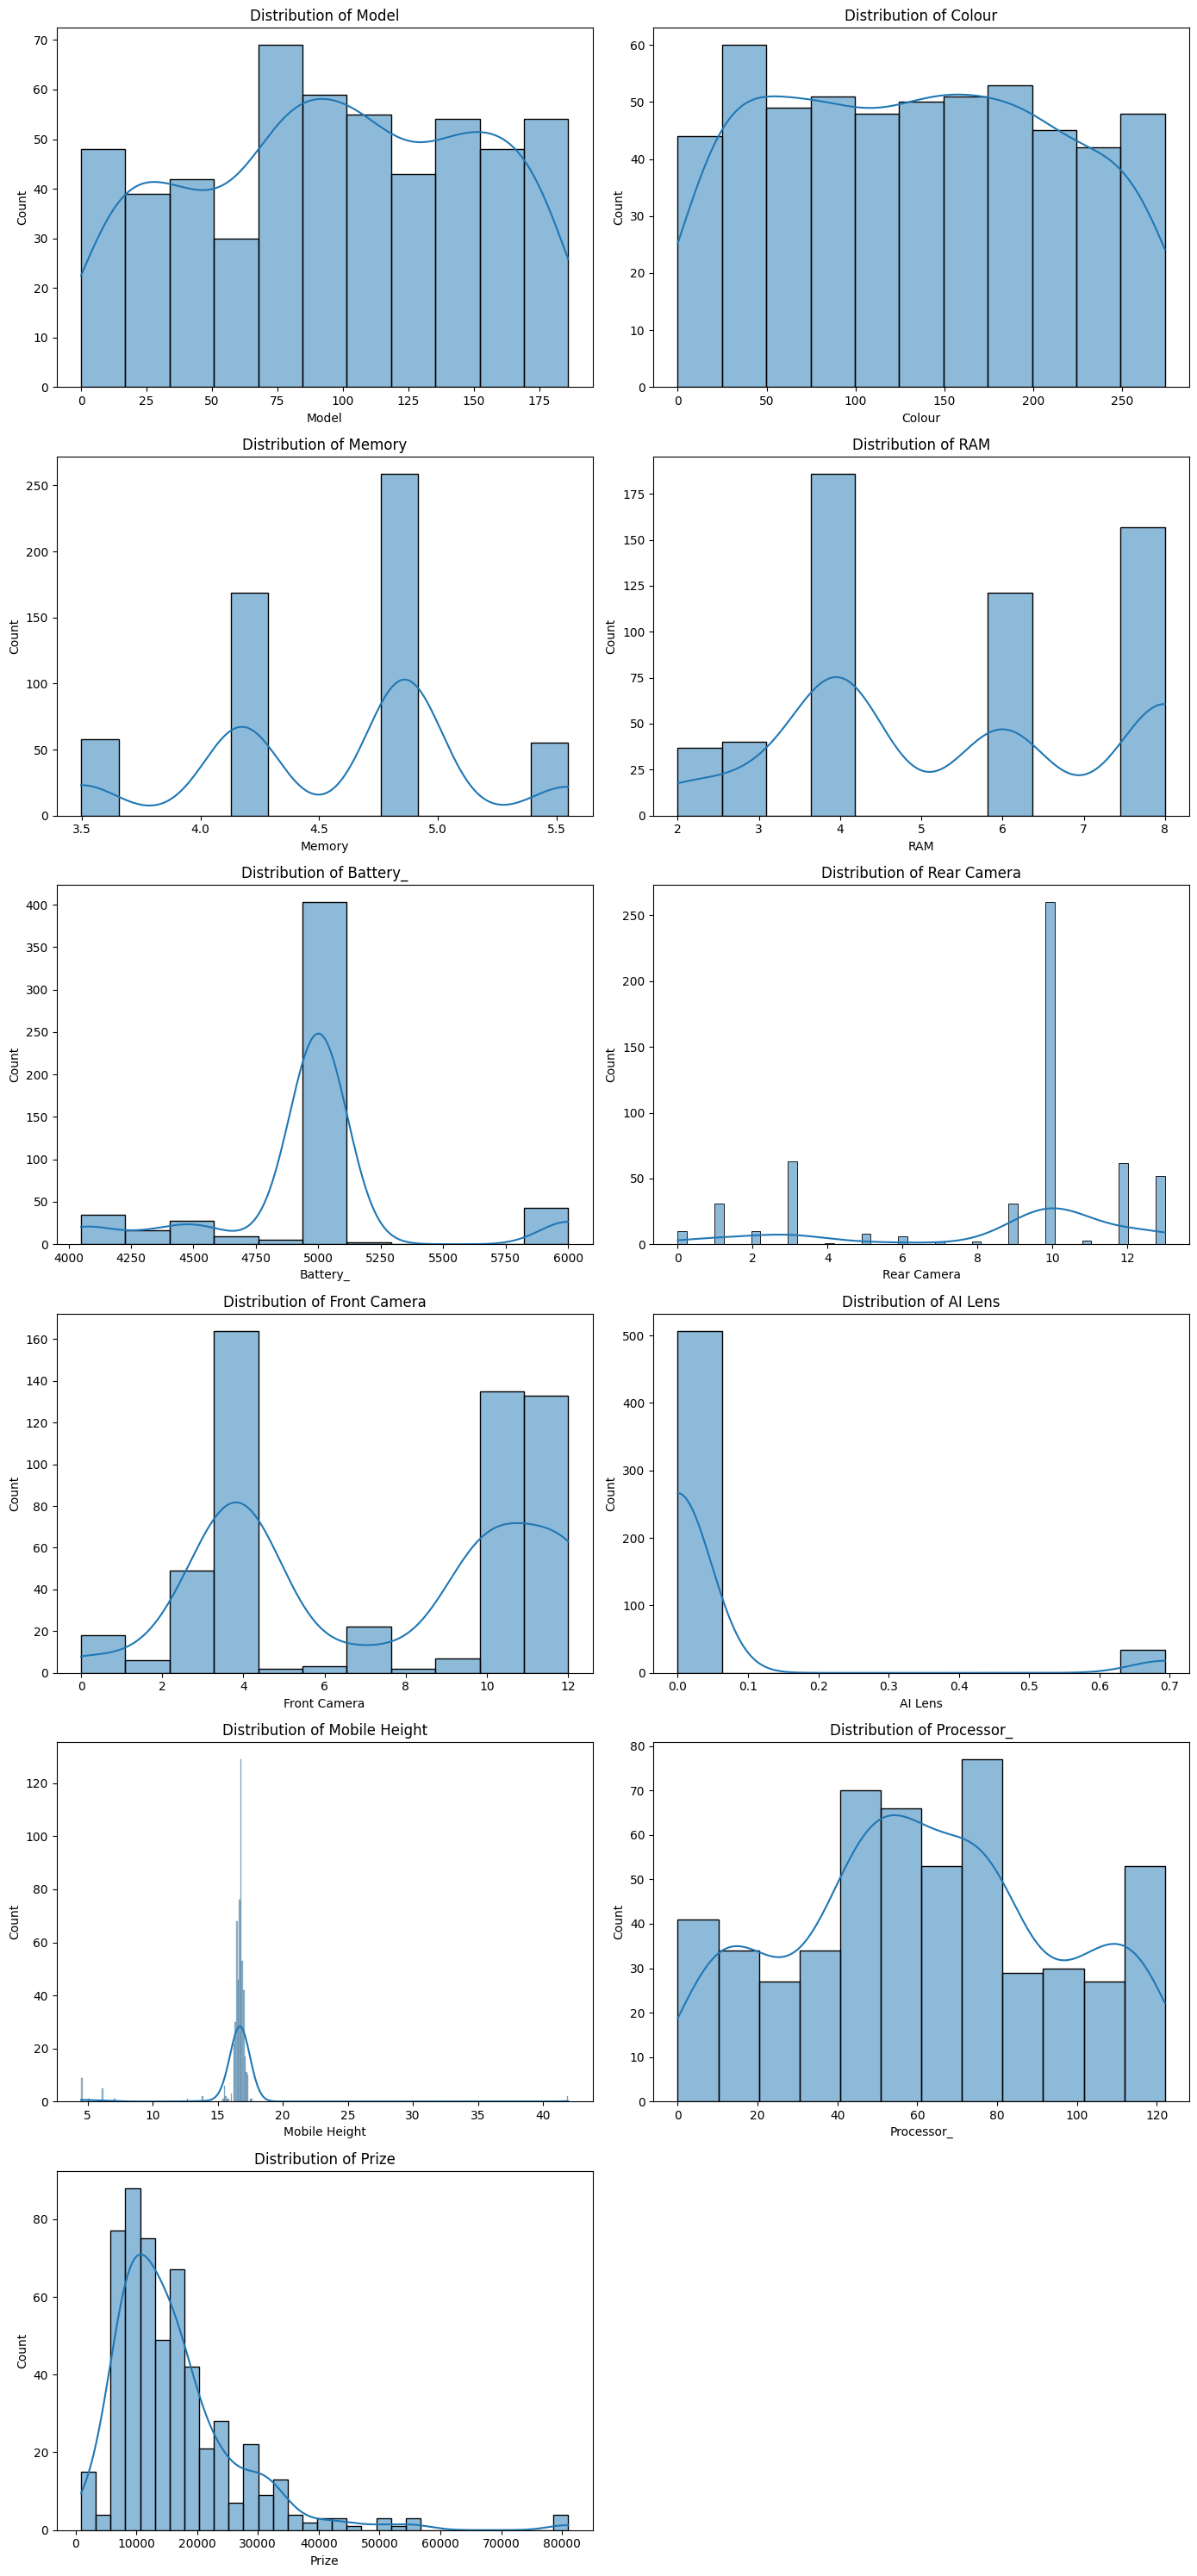

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of rows and columns required for subplots
num_cols = 2
num_rows = math.ceil(len(data.columns) / num_cols)

plt.figure(figsize=(14, num_rows * 5))

for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder


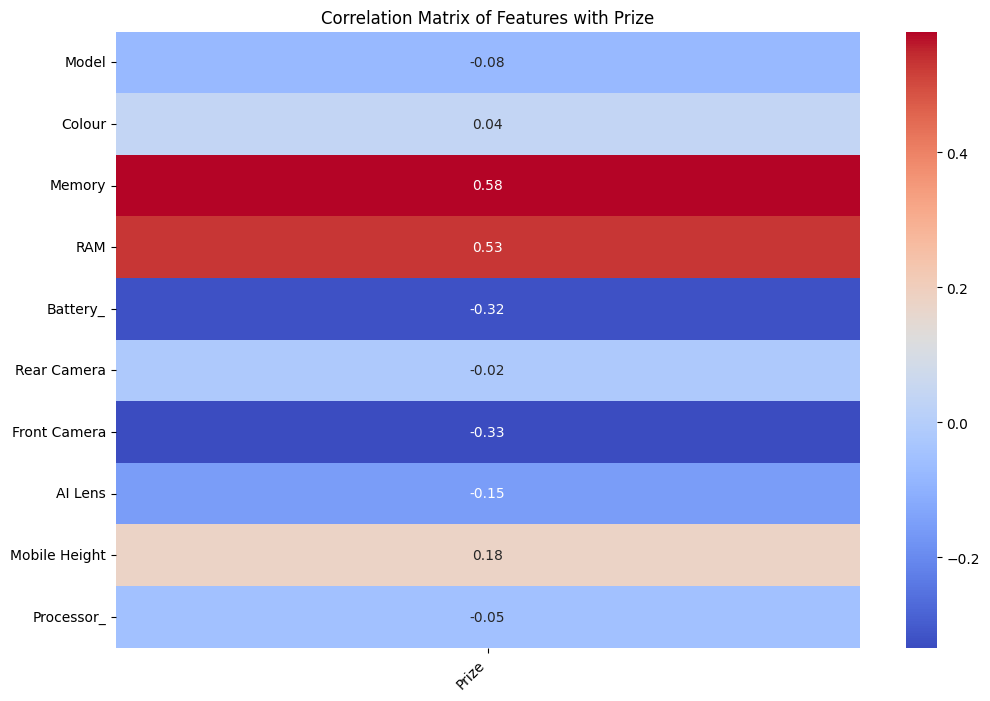

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_list:
    data[col] = label_encoder.fit_transform(data[col])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of categorical columns with 'Prize'
categorical_prize_corr = correlation_matrix[['Prize']].drop(index='Prize')

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(categorical_prize_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features with Prize')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Parsing camera resolutions
def extract_highest_mp(camera_str):
    mp_values = [int(x.replace('MP', '')) for x in camera_str.split('+')]
    return max(mp_values)

data['Rear Camera Max MP'] = data['Rear Camera'].apply(extract_highest_mp)
data['Front Camera Max MP'] = data['Front Camera'].apply(extract_highest_mp)

In [ ]:
def extract_highest_mp(camera_str):
    # Ensure the input is a string
    if isinstance(camera_str, str):
        mp_values = [int(x.replace('MP', '').strip()) for x in camera_str.split('+')]
        return max(mp_values)
    else:
        # Handle non-string cases, such as integers
        return camera_str

# Convert the columns to strings if they are not already
data['Rear Camera'] = data['Rear Camera'].astype(str)
data['Front Camera'] = data['Front Camera'].astype(str)

# Apply the function to the columns
data['Rear Camera Max MP'] = data['Rear Camera'].apply(extract_highest_mp)
data['Front Camera Max MP'] = data['Front Camera'].apply(extract_highest_mp)


In [ ]:
data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera Max MP,Front Camera Max MP
0,Infinix SMART 7,Night Black,4.174387,4,6000,13MP,5MP,0.693147,16.76,Unisoc Spreadtrum SC9863A1,7299.0,13,5
1,Infinix SMART 7,Azure Blue,4.174387,4,6000,13MP,5MP,0.693147,16.76,Unisoc Spreadtrum SC9863A1,7299.0,13,5
2,MOTOROLA G32,Mineral Gray,4.859812,8,5000,50MP,16MP,0.000000,16.64,Qualcomm Snapdragon 680,11999.0,50,16
3,POCO C50,Royal Blue,3.496508,2,5000,8MP,5MP,0.000000,16.56,Mediatek Helio A22,5649.0,8,5
4,Infinix HOT 30i,Marigold,4.859812,8,5000,50MP,5MP,0.693147,16.76,G37,8999.0,50,5


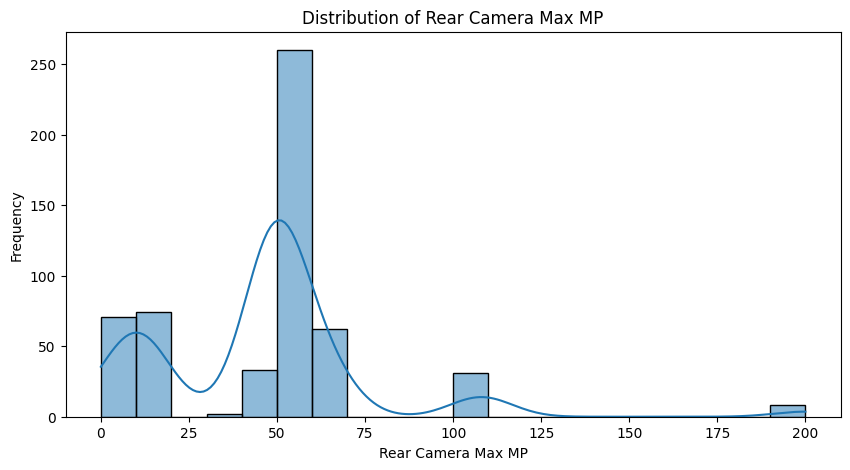

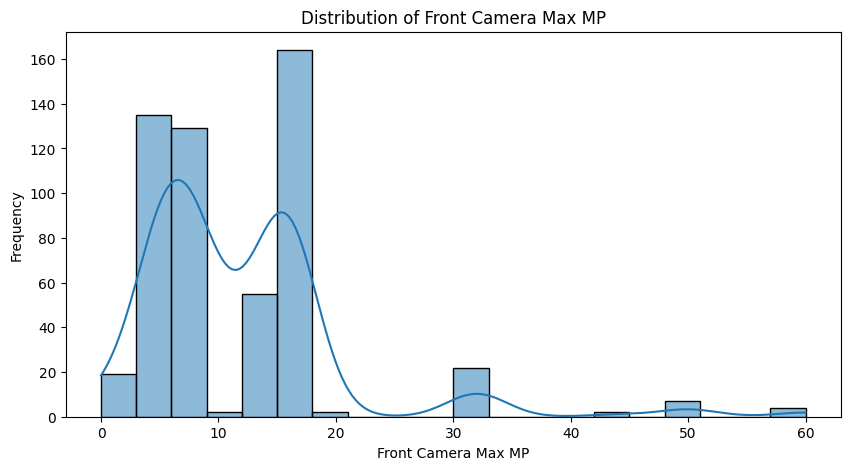

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Rear Camera Max MP
plt.figure(figsize=(10, 5))
sns.histplot(data['Rear Camera Max MP'], kde=True, bins=20)
plt.title('Distribution of Rear Camera Max MP')
plt.xlabel('Rear Camera Max MP')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Front Camera Max MP
plt.figure(figsize=(10, 5))
sns.histplot(data['Front Camera Max MP'], kde=True, bins=20)
plt.title('Distribution of Front Camera Max MP')
plt.xlabel('Front Camera Max MP')
plt.ylabel('Frequency')
plt.show()


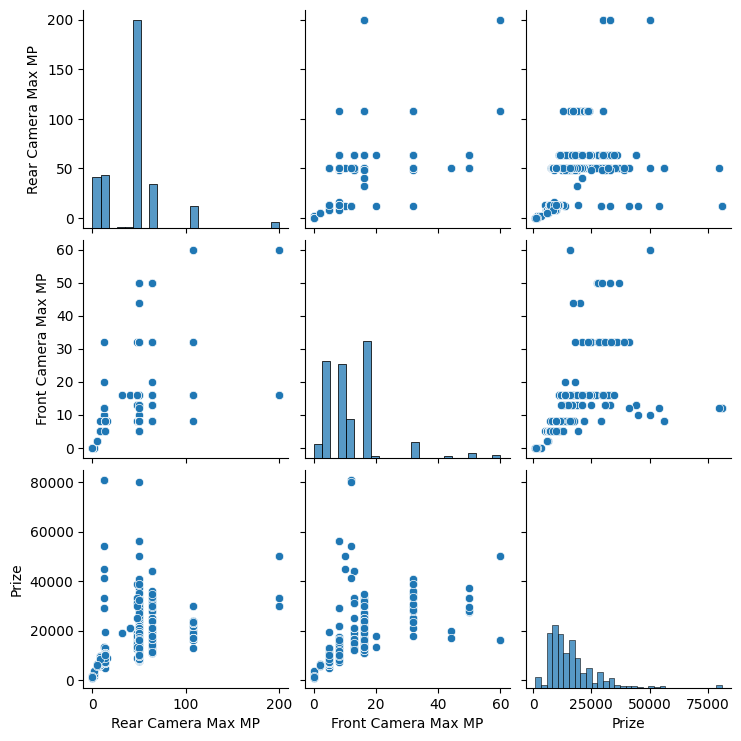

In [ ]:
# Pair plot
sns.pairplot(data[['Rear Camera Max MP', 'Front Camera Max MP', 'Prize']])
plt.show()


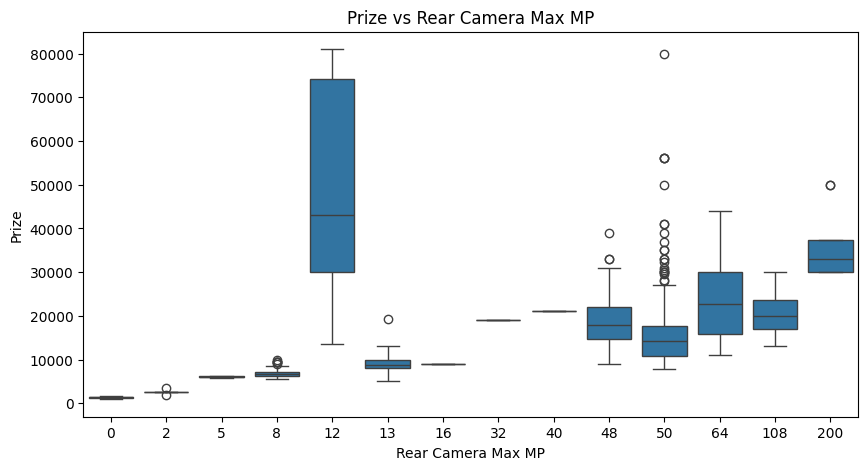

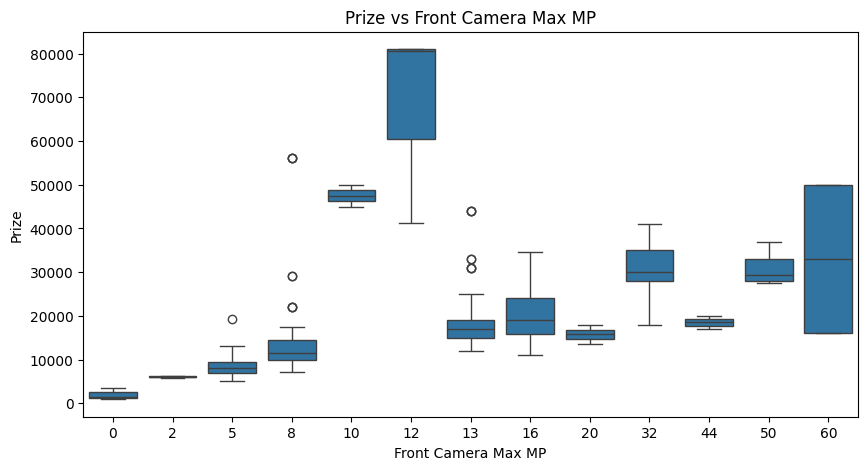

In [ ]:
# Box plot for Rear Camera Max MP
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rear Camera Max MP', y='Prize', data=data)
plt.title('Prize vs Rear Camera Max MP')
plt.xlabel('Rear Camera Max MP')
plt.ylabel('Prize')
plt.show()

# Box plot for Front Camera Max MP
plt.figure(figsize=(10, 5))
sns.boxplot(x='Front Camera Max MP', y='Prize', data=data)
plt.title('Prize vs Front Camera Max MP')
plt.xlabel('Front Camera Max MP')
plt.ylabel('Prize')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score


In [ ]:
X= data.drop('Prize', axis=1)
Y= data['Prize']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(Y_test, y_pred)
print(f'mse:{mse}',f'mae: {mae}', f'rmse: {rmse}')

mse:80243375.42699021 mae: 4548.2825685455655 rmse: 8957.866678344248


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt

# Define the regression algorithms and their respective hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]})
}

# Initialize dictionaries to store evaluation metrics
evaluation_metrics = {
    'MSE': {},
    'MAE': {},
    'RMSE': {},
    'R-squared': {},
    'MedAE': {}
}

# Perform grid search with cross-validation for each model
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    medae = median_absolute_error(Y_test, y_pred)

    # Store evaluation metrics in the dictionary
    evaluation_metrics['MSE'][name] = mse
    evaluation_metrics['MAE'][name] = mae
    evaluation_metrics['RMSE'][name] = rmse
    evaluation_metrics['R-squared'][name] = r2
    evaluation_metrics['MedAE'][name] = medae

# Print evaluation metrics for each model
for metric, values in evaluation_metrics.items():
    print(f"{metric}:")
    for model, value in values.items():
        print(f"{model}: {value}")
    print()


MSE:
Linear Regression: 87188997.00250557
Decision Tree: 73847336.73961973
Random Forest: 32493869.84330749

MAE:
Linear Regression: 4896.29389828248
Decision Tree: 2697.7806131384687
Random Forest: 1840.70243119266

RMSE:
Linear Regression: 9337.504859570654
Decision Tree: 8593.44731406551
Random Forest: 5700.339449831693

R-squared:
Linear Regression: 0.3674062795412075
Decision Tree: 0.4642057702218223
Random Forest: 0.7642429810760303

MedAE:
Linear Regression: 2904.3276287144417
Decision Tree: 700.0
Random Forest: 662.4549999999999



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

# Get the best model from grid search
best_rf_regressor = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred = best_rf_regressor.predict(X_test_scaled)

# Calculate evaluation metrics with the best model
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
r_squared = r2_score(Y_test, y_pred)
medae = median_absolute_error(Y_test, y_pred)

# Print evaluation metrics
print("Best Model Mean Squared Error (MSE):", mse)
print("Best Model Mean Absolute Error (MAE):", mae)
print("Best Model Root Mean Squared Error (RMSE):", rmse)
print("Best Model R-squared (R²):", r_squared)
print("Best Model Median Absolute Error (MedAE):", medae)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Model Mean Squared Error (MSE): 32852380.504520886
Best Model Mean Absolute Error (MAE): 1866.4450334207077
Best Model Root Mean Squared Error (RMSE): 5731.699617436428
Best Model R-squared (R²): 0.761641831839337
Best Model Median Absolute Error (MedAE): 608.7000000000007
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


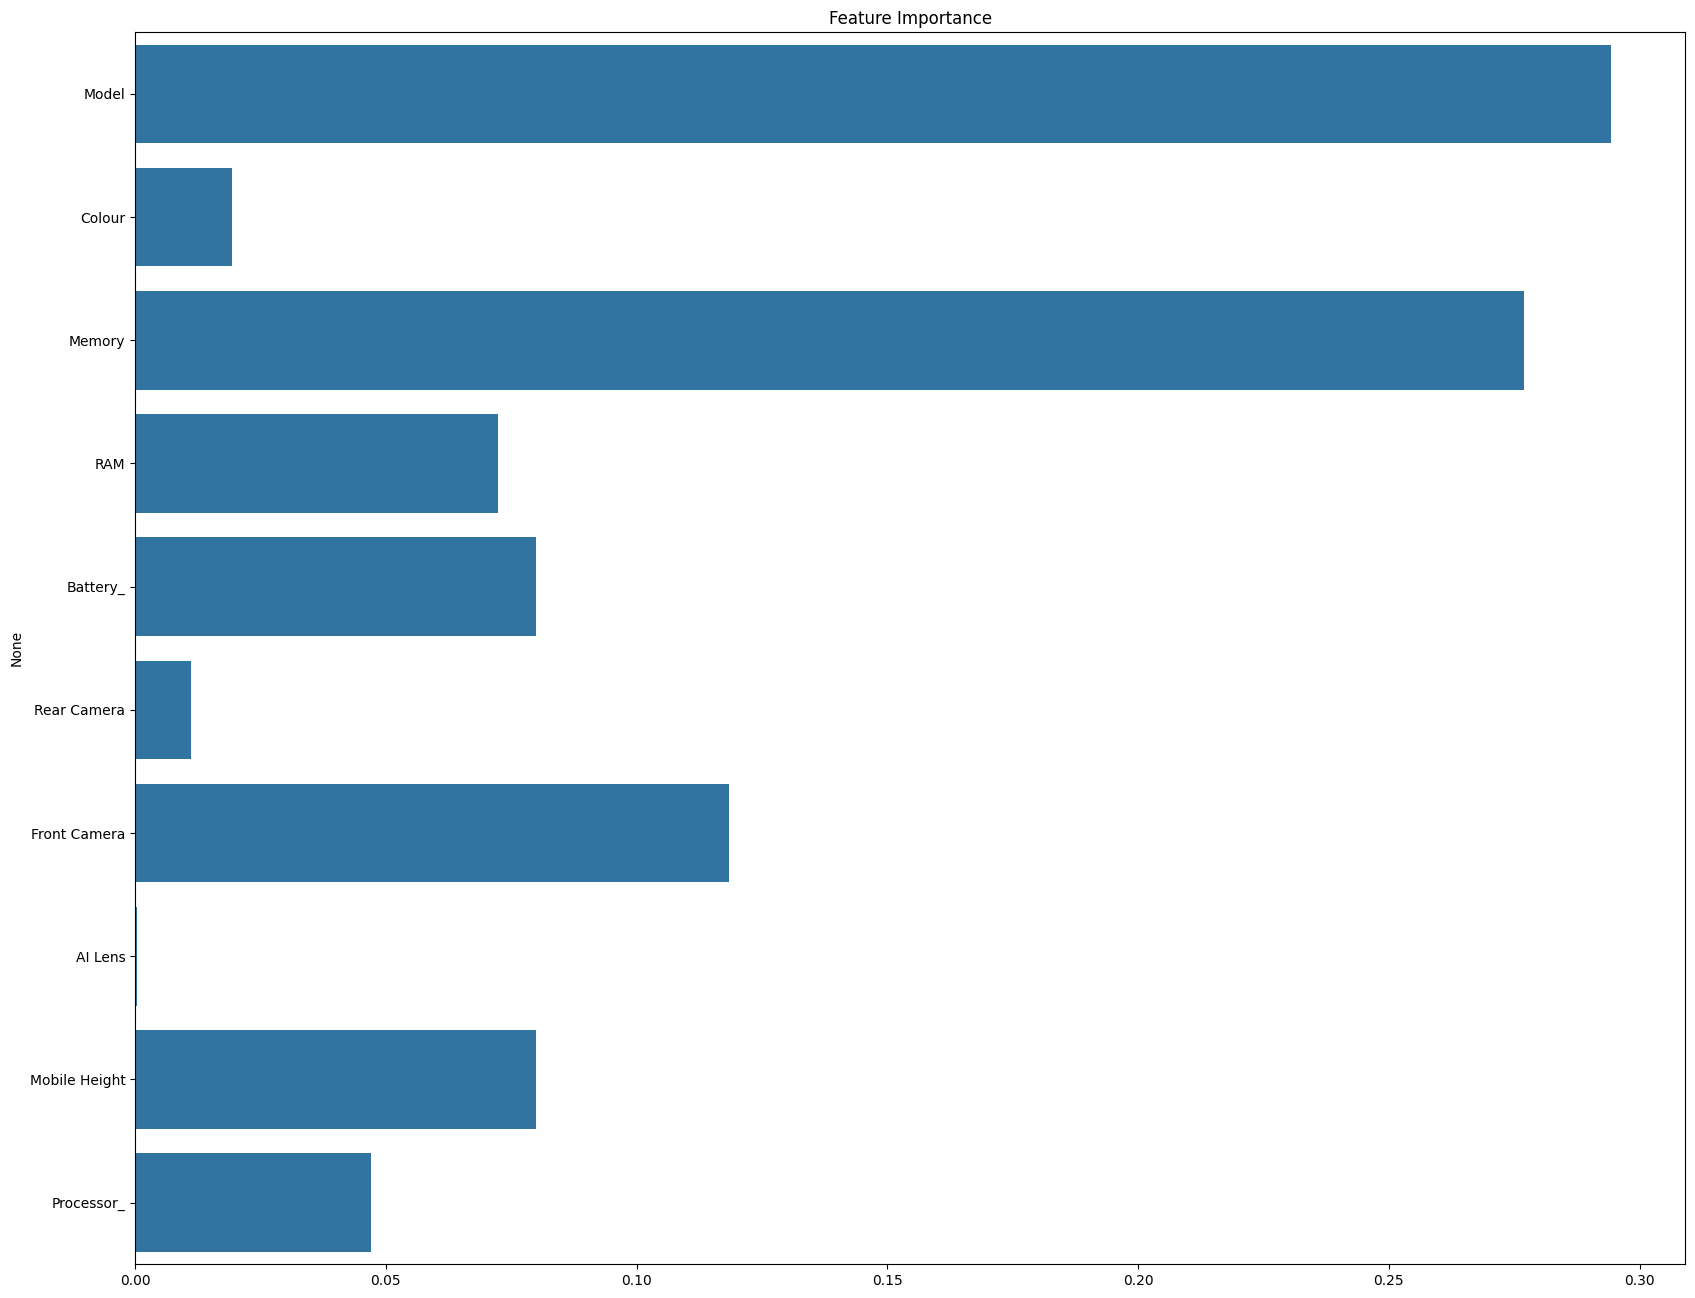

In [ ]:
# Feature importance
feature_importance = best_rf_regressor.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(20, 16))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.show()




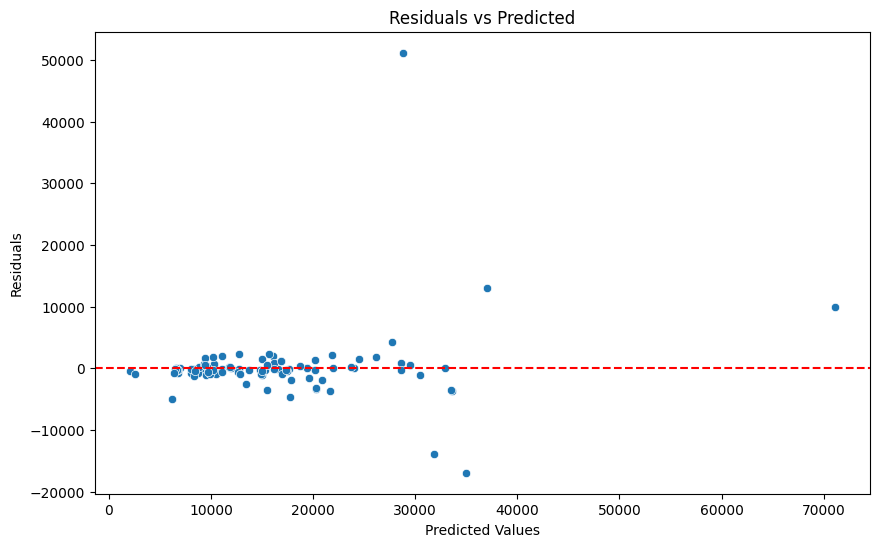

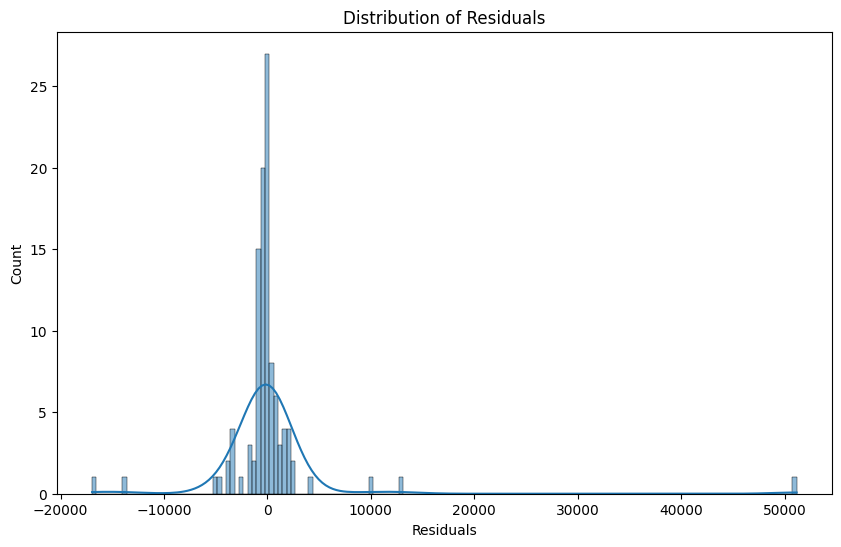

In [ ]:
# Residual analysis
residuals = Y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
LGBMRegressor(verbosity=-1)
import logging
import lightgbm as lgb
import logging

class FilterWarnings(logging.Filter):
    def filter(self, record):
        # Filter out specific warning messages
        return "No further splits with positive gain" not in record.getMessage()

# Create logger
logger = logging.getLogger()
logger.addFilter(FilterWarnings())


# Define models
models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Hyperparameter tuning for LightGBM

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Hyperparameter tuning for CatBoost
cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid search for each model
for name, param_grid in zip(models.keys(), [xgb_param_grid, lgb_param_grid, cat_param_grid]):
    model = models[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, Y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    medae = median_absolute_error(Y_test, y_pred)

    print(f"{name} Model Mean Squared Error (MSE):", mse)
    print(f"{name} Model Mean Absolute Error (MAE):", mae)
    print(f"{name} Model Root Mean Squared Error (RMSE):", rmse)
    print(f"{name} Model R-squared (R²):", r2)
    print(f"{name} Model Median Absolute Error (MedAE):", medae)
    print(f"{name} Best Parameters:", grid_search.best_params_)
    print()


XGBoost Model Mean Squared Error (MSE): 27401609.475652594
XGBoost Model Mean Absolute Error (MAE): 1493.358824003727
XGBoost Model Root Mean Squared Error (RMSE): 5234.654666322564
XGBoost Model R-squared (R²): 0.8011895229823112
XGBoost Model Median Absolute Error (MedAE): 449.427734375
XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 10
[LightGBM] [Info] Start training from score 16376.893519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=300)
scores = cross_val_score(xgb_model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Calculate the R² score
r2 = r2_score(Y_test, y_pred)
print(f"Mean MSE: {mean_mse}, Std MSE: {std_mse}, R²: {r2}")


Mean MSE: 31342137.498868406, Std MSE: 29644655.02023367, R²: 0.7142428581627134


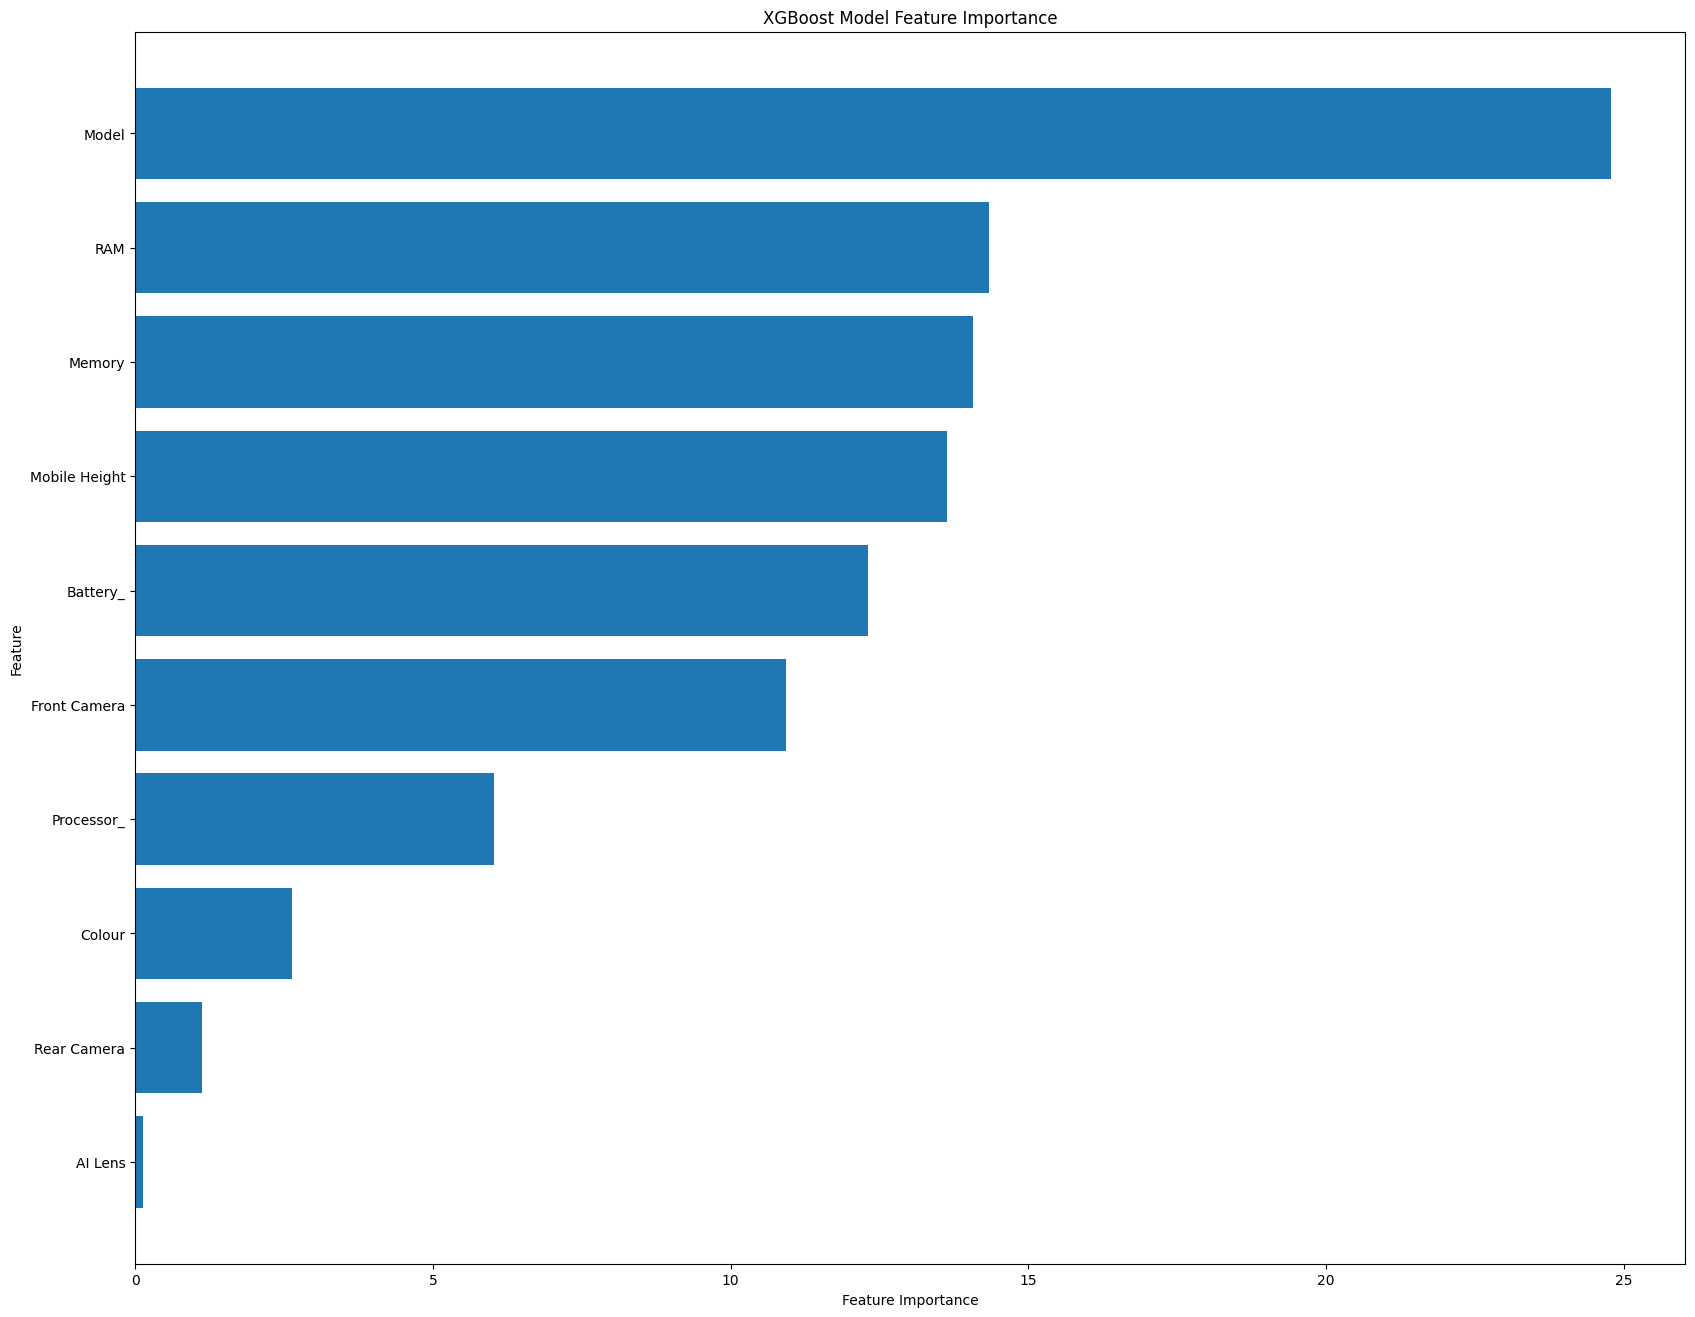

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor

# Get feature importance from the XGBoost model
feature_importance = best_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance and feature names
sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(20, 16))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Model Feature Importance')
plt.show()
